# Tratamento e limpeza de dados

In [62]:
import pandas as pd
import seaborn as srn
import statistics as sts

In [63]:
#importar os dados
dataset = pd.read_csv("Churn.csv", sep=";")
#visualizar
dataset.head()

,X0,X1,X2,X3,X4,X4.1,X6,X7,X8,X9,X10,X11
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


Primeiro problema encontrado, não há nomes definidos nas colunas "X0, X1, X2...". Indicado dar significado para elas.

In [64]:
#tamanho
dataset.shape

(999, 12)

999 linhas com 12 colunas

In [65]:
#resolvendo o primeiro problema
dataset.columns = ["Id", "Score", "Estado", "Genero", "Idade", "Patrimonio", "Saldo", "Produtos", "TemCartCredito", "Ativo", "Salario", "Saiu"]

In [66]:
dataset.head()

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


Dados de uma instituição financeira, objetivo de fazer um modelo para prever os clientes que irão deixar o banco para poder prevenir esta saída.

OBS: Um dos principais problemas ao treinar modelos, são dados faltantes. Para isso, quando é um valor numérico, é substituído pela mediana dos valores. Quando é um valor categórico, é substituido pela moda.

## Análise exploratória

In [67]:
#explorar dados categoricos
#estado
agrupado = dataset.groupby(["Estado"]).size()
agrupado

Estado
PR    257
RP      1
RS    478
SC    258
SP      4
TD      1
dtype: int64

RP e TD não são estados válidos


E SP não é um estado do domínio da regra de negócio (RS,SC,PR)

Serão substituídos pela moda, ou seja, RS (valor mais comum)


<Axes: xlabel='Estado'>

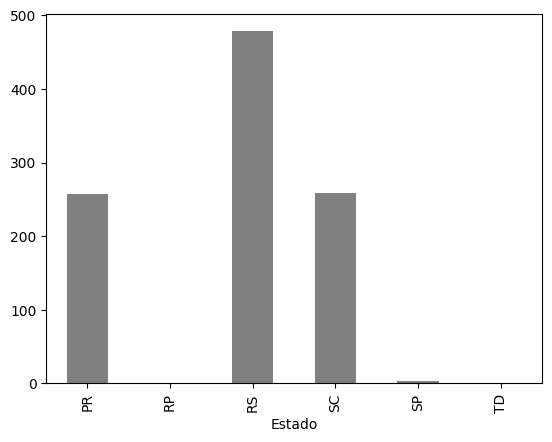

In [68]:
agrupado.plot.bar(color= "gray")

In [69]:
agrupado = dataset.groupby(["Genero"]).size()
agrupado

Genero
F              2
Fem            1
Feminino     461
M              6
Masculino    521
dtype: int64

Mais um problema, categorias que possuem mesmo significado.

É necessário unificar estes dados.

<Axes: xlabel='Genero'>

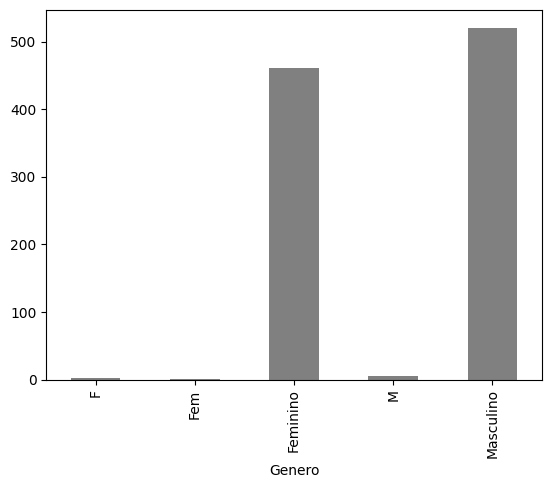

In [70]:
agrupado.plot.bar(color= "gray")

In [71]:
#explorar colunas numéricas
dataset["Score"].describe()

count    999.000000
mean     648.621622
std       98.264219
min      376.000000
25%      580.000000
50%      653.000000
75%      721.000000
max      850.000000
Name: Score, dtype: float64

mediana e edia estao proximos. Indicio que não existe grandes outliers

Aparentemente sem problemas

Text(0.5, 1.0, 'Score')

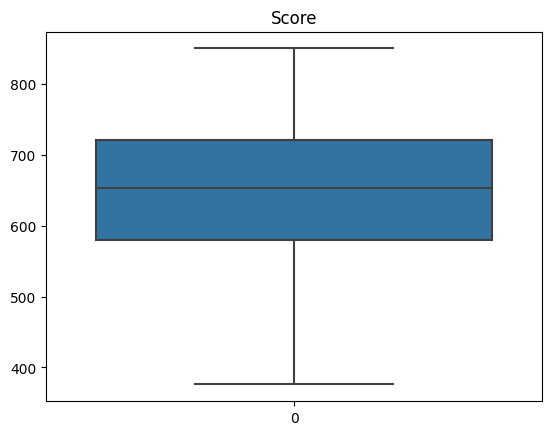

In [72]:
srn.boxplot(dataset["Score"]).set_title("Score")

Text(0.5, 1.0, 'Score')

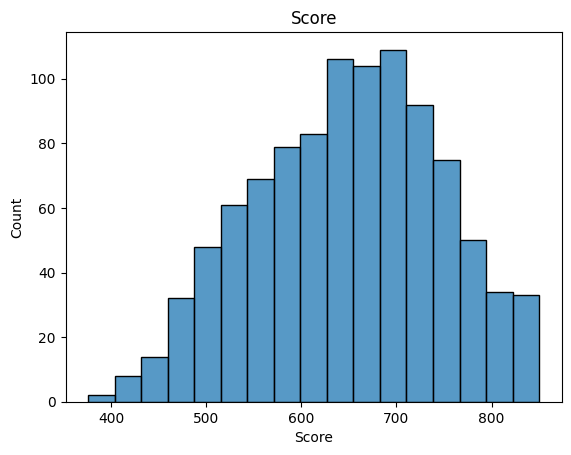

In [73]:
srn.histplot(dataset["Score"]).set_title("Score")

In [74]:
dataset["Idade"].describe()

count    999.000000
mean      38.902903
std       11.401912
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: Idade, dtype: float64

Media e mediana proximas.

Porém menor idade é uma idade negativa.
E maior Idade é 140 anos. (Problemas)

Text(0.5, 1.0, 'Idade')

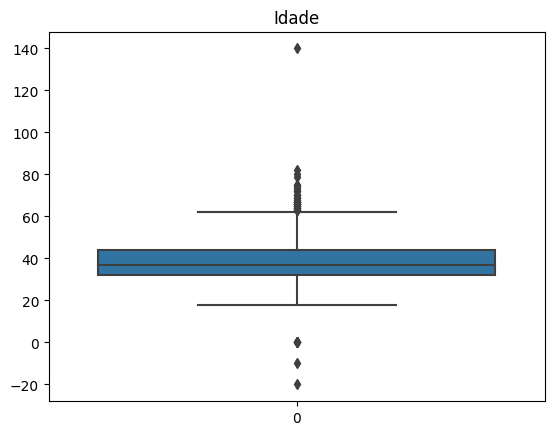

In [75]:
srn.boxplot(dataset["Idade"]).set_title("Idade")

Text(0.5, 1.0, 'Idade')

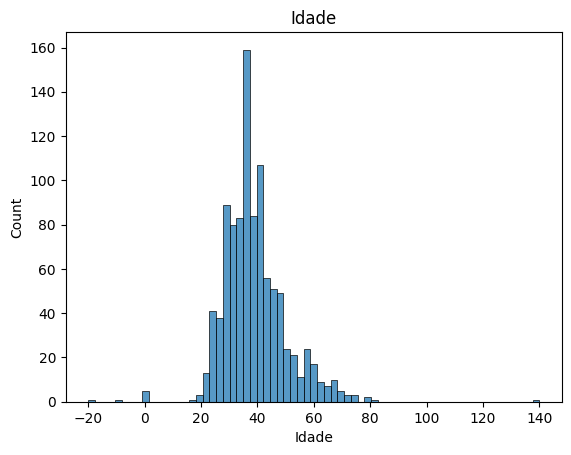

In [76]:
srn.histplot(dataset["Idade"]).set_title("Idade")


In [77]:
dataset["Saldo"].describe()

count    9.990000e+02
mean     7.164928e+06
std      6.311840e+06
min      0.000000e+00
25%      0.000000e+00
50%      8.958835e+06
75%      1.258684e+07
max      2.117743e+07
Name: Saldo, dtype: float64

Text(0.5, 1.0, 'Saldo')

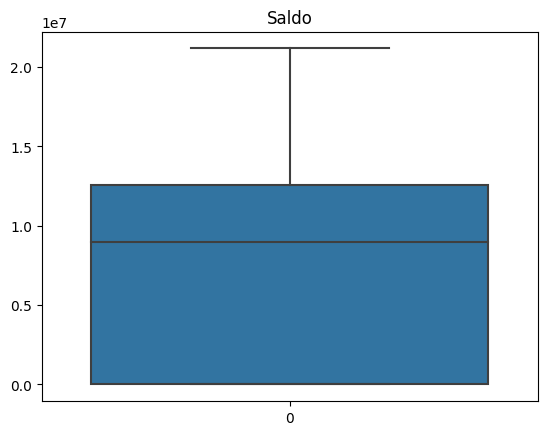

In [78]:
srn.boxplot(dataset["Saldo"]).set_title("Saldo")


Text(0.5, 1.0, 'Saldo')

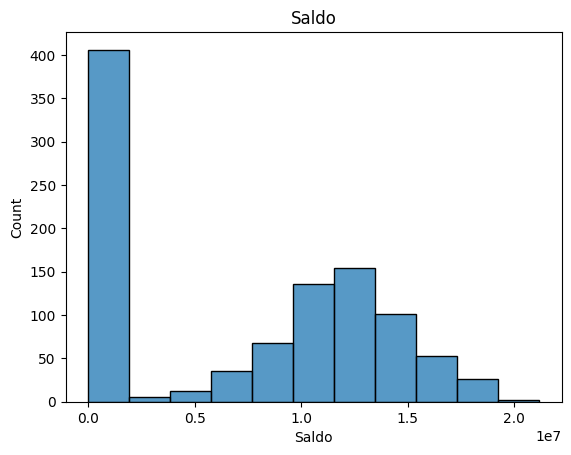

In [79]:
srn.histplot(dataset["Saldo"]).set_title("Saldo")


Muitas pessoas com saldo 0 na conta. Apenas uma análise, sem necessidade de alterar

In [80]:
dataset["Salario"].describe()


count    9.920000e+02
mean     3.528762e+07
std      5.305800e+08
min      9.677000e+03
25%      3.029011e+06
50%      8.703250e+06
75%      1.405213e+07
max      1.193469e+10
Name: Salario, dtype: float64

Media e mediana bastante distantes (ficar de olho)

Text(0.5, 1.0, 'Salario')

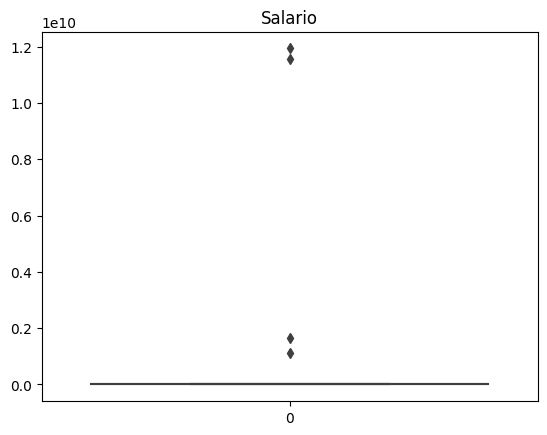

In [81]:
srn.boxplot(dataset["Salario"]).set_title("Salario")

Text(0.5, 1.0, 'Salario')

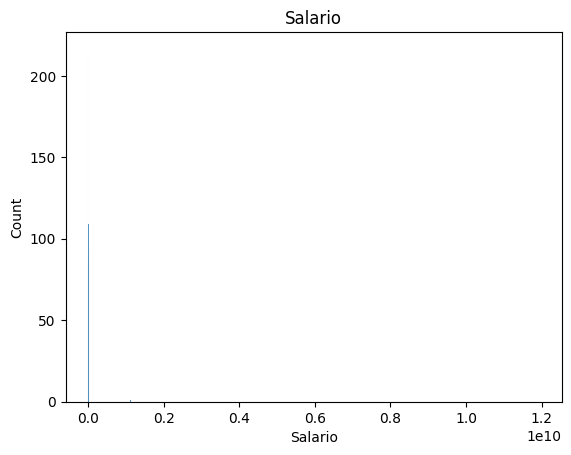

In [82]:
srn.histplot(dataset["Salario"]).set_title("Salario")

Uma distorção muito grande, muitas pessoas com salario 0 (Provavelmente porque os clientes não informaram o salario)

In [83]:
#contamos valores NaN
dataset.isnull().sum()

Id                0
Score             0
Estado            0
Genero            8
Idade             0
Patrimonio        0
Saldo             0
Produtos          0
TemCartCredito    0
Ativo             0
Salario           7
Saiu              0
dtype: int64

vemos que Genero e Salario há valores NaN

##Tratamento nos Dados

Remover nas e substituir pela mediana

In [84]:
dataset['Salario'].describe()

count    9.920000e+02
mean     3.528762e+07
std      5.305800e+08
min      9.677000e+03
25%      3.029011e+06
50%      8.703250e+06
75%      1.405213e+07
max      1.193469e+10
Name: Salario, dtype: float64

In [85]:
mediana = sts.median(dataset['Salario'])
mediana

70518.0

Substituir NaN por mediana

In [86]:
dataset['Salario'].fillna(mediana, inplace=True)

Verificar se não há mais NAN

In [87]:
dataset['Salario'].isnull().sum()

0

Agora resolver o genero (falta de padronização e NaNs)

In [88]:
agrupado = dataset.groupby(["Genero"]).size()
agrupado

Genero
F              2
Fem            1
Feminino     461
M              6
Masculino    521
dtype: int64

In [89]:
dataset['Genero'].isnull().sum()

8

Preenchemos NaN com a moda (Masculino)

In [90]:
dataset['Genero'].fillna("Masculino", inplace=True)

In [91]:
dataset['Genero'].isnull().sum()

0

Padronizar os dados

In [92]:
dataset.loc[dataset['Genero'] == "M", "Genero"] = "Masculino"
dataset.loc[dataset['Genero'].isin(["Fem", "F"]), "Genero"] = "Feminino"


In [93]:
agrupado = dataset.groupby(["Genero"]).size()
agrupado

Genero
Feminino     464
Masculino    535
dtype: int64

Agora vamos tratar as idades fora do dominio

In [94]:
dataset['Idade'].describe()

count    999.000000
mean      38.902903
std       11.401912
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: Idade, dtype: float64

In [95]:
dataset.loc[(dataset['Idade'] < 0 )| (dataset['Idade'] > 120)]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
867,869,636,RS,Feminino,-10,1,17083346,1,1,0,11051028.0,1
984,986,773,RS,Masculino,-20,1,12453278,2,0,1,1172357.0,0
990,992,655,RS,Masculino,140,5,93147,2,1,0,6621413.0,0


Há tres ocorrencias, vamos substituir pela mediana

In [96]:
mediana = sts.median(dataset['Idade'])
mediana

37

In [97]:
dataset.loc[(dataset['Idade'] < 0 )| (dataset['Idade'] > 120), "Idade"] = mediana

Vamos verificar se está tudo ok agora

In [98]:
dataset.loc[(dataset['Idade'] < 0 )| (dataset['Idade'] > 120)]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu


Agora, mais um tratamento é verificar os duplicados pelo ID

In [99]:
dataset[dataset.duplicated(['Id'], keep =False)]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
80,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0
81,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0


Podemos ver vários duplicados, vamos substituir os ultimos pelas preimeiras ocorrencias dos IDs

In [100]:
dataset.drop_duplicates(subset='Id', keep='first', inplace=True)
dataset[dataset.duplicated(['Id'], keep =False)]


,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu


Agora vamos resolver o problema dos estados fora do domínio

In [101]:
agrupado = dataset.groupby(["Estado"]).size()
agrupado

Estado
PR    257
RP      1
RS    477
SC    258
SP      4
TD      1
dtype: int64

In [102]:
dataset.loc[dataset['Estado'].isin(['RP', 'SP', 'TD']), "Estado"] = "RS"
agrupado = dataset.groupby(["Estado"]).size()


In [103]:
agrupado

Estado
PR    257
RS    483
SC    258
dtype: int64

Por fim, vamos verificar os Outliers no salário.

Vamos considerar 2 desvios padrão

In [104]:
desv = sts.stdev(dataset["Salario"])
desv

528988918.4679201

Definmos o padrao como maior que 2 desvios padrao, logo vamos ver se algum registro atende o criterio

In [105]:
dataset.loc[dataset["Salario"] >= 2 *desv]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
7,8,376,PR,Feminino,29,4,11504674,4,1,0,1.193469e+10,1
116,118,668,PR,Feminino,37,6,1678644,1,1,0,1.156383e+10,0
170,172,484,RS,Feminino,29,4,13011439,1,1,0,1.640179e+09,0
230,232,673,RS,Masculino,72,1,0,2,0,1,1.119812e+09,0


Então, vamos alterar eles para a mediana

In [106]:
mediana = sts.median(dataset["Salario"])
mediana

8637195.5

In [107]:
dataset.loc[dataset["Salario"] >= 2 *desv, "Salario"] = mediana
dataset.loc[dataset["Salario"] >= 2 *desv]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu


In [108]:
dataset.head(8)

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0
5,6,645,SC,Masculino,44,8,11375578,2,1,0,14975671.0,1
6,7,822,RS,Masculino,50,7,0,2,1,1,100628.0,0
7,8,376,PR,Feminino,29,4,11504674,4,1,0,8637195.5,1


In [109]:
dataset.shape

(998, 12)